In [67]:
import investpy
from datetime import datetime
import pandas as pd
from prompt_toolkit import prompt
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
from_date = input('Start date (DD/MM/YYYY): ')

Start date (DD/MM/YYYY): 01/01/2016


In [69]:
to_date = input('End date (DD/MM/YYYY): ')

End date (DD/MM/YYYY): 18/12/2020


In [70]:
btc = investpy.get_crypto_historical_data(crypto='bitcoin', from_date=from_date, to_date=to_date)
print(btc.head())

             Open   High    Low  Close  Volume Currency
Date                                                   
2016-01-01  430.0  438.0  425.9  434.0   46973      USD
2016-01-02  434.0  437.4  430.7  433.7   33570      USD
2016-01-03  433.7  434.1  423.1  430.7   54826      USD
2016-01-04  430.7  435.3  428.6  433.3   53008      USD
2016-01-05  433.3  435.3  428.9  431.2   45030      USD


In [71]:
btc.reset_index(inplace = True)
print(btc.head())

        Date   Open   High    Low  Close  Volume Currency
0 2016-01-01  430.0  438.0  425.9  434.0   46973      USD
1 2016-01-02  434.0  437.4  430.7  433.7   33570      USD
2 2016-01-03  433.7  434.1  423.1  430.7   54826      USD
3 2016-01-04  430.7  435.3  428.6  433.3   53008      USD
4 2016-01-05  433.3  435.3  428.9  431.2   45030      USD


In [72]:
csvPath = 'data/stocks'
csvName = input("Save csv as: ") + '.csv'
csvFileName = os.path.join(csvPath, csvName)
btc.to_csv(csvFileName)

Save csv as: btc


Save graph as: btc


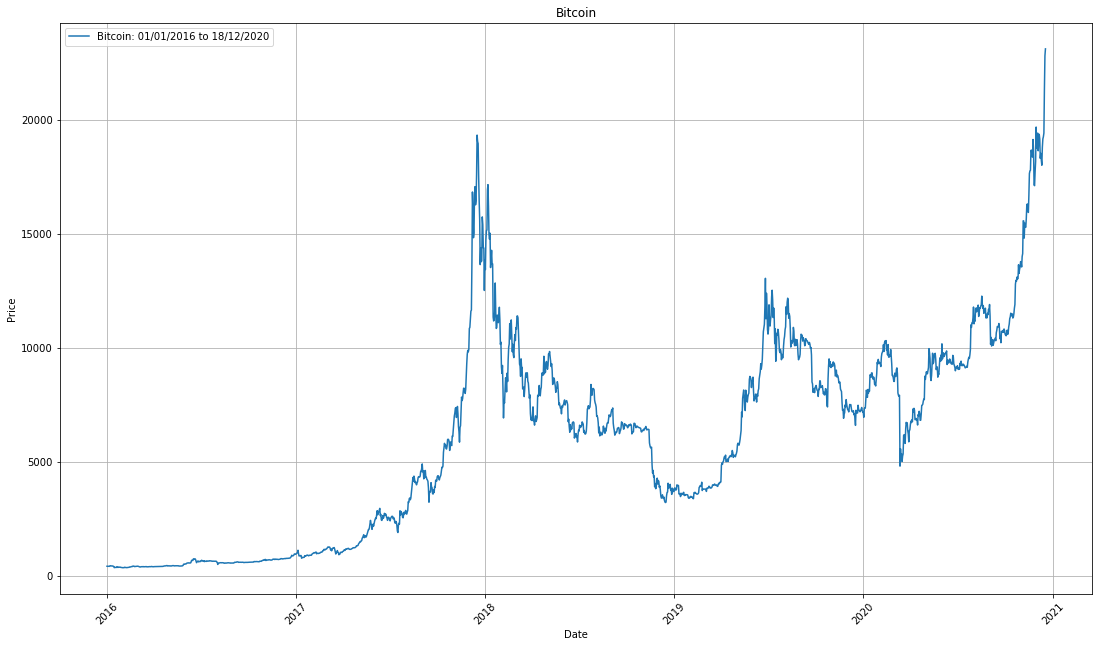

In [77]:
fig, ax = plt.subplots()
ax.plot(btc['Date'], btc['Close'], label='Bitcoin: ' + from_date + ' to ' + to_date)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.set_title('Bitcoin')
plt.xticks(rotation=45)
# plt.text(x=1970, y=400, s=r'Stock Price at this interval')
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend(loc='upper left')
graphPath = 'data/stocks'
graphName = input('Save graph as: ') + '.png'
graphFileName = os.path.join(graphPath, graphName)
plt.savefig(graphFileName)

In [74]:
btc.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2016-01-01,430.0,438.0,425.9,434.0,46973,USD
1,2016-01-02,434.0,437.4,430.7,433.7,33570,USD
2,2016-01-03,433.7,434.1,423.1,430.7,54826,USD
3,2016-01-04,430.7,435.3,428.6,433.3,53008,USD
4,2016-01-05,433.3,435.3,428.9,431.2,45030,USD


In [78]:
close_px = btc['Close']
btc['50d'] = close_px.rolling(window=50).mean()
btc['200d'] = close_px.rolling(window=200).mean()

In [80]:
btc.tail()

,Date,Open,High,Low,Close,Volume,Currency,50d,200d
1809,2020-12-14,19176.4,19346.5,19007.0,19273.8,67109,USD,16896.332,12115.0805
1810,2020-12-15,19273.9,19556.3,19076.2,19434.9,98385,USD,17023.798,12165.1310
1811,2020-12-16,19434.7,21525.3,19299.7,21352.2,199809,USD,17177.686,12223.4295
1812,2020-12-17,21352.3,23738.0,21243.1,22825.4,310744,USD,17368.616,12290.2825
1813,2020-12-18,22823.3,23272.8,22361.5,23127.9,131801,USD,17562.030,12354.9755


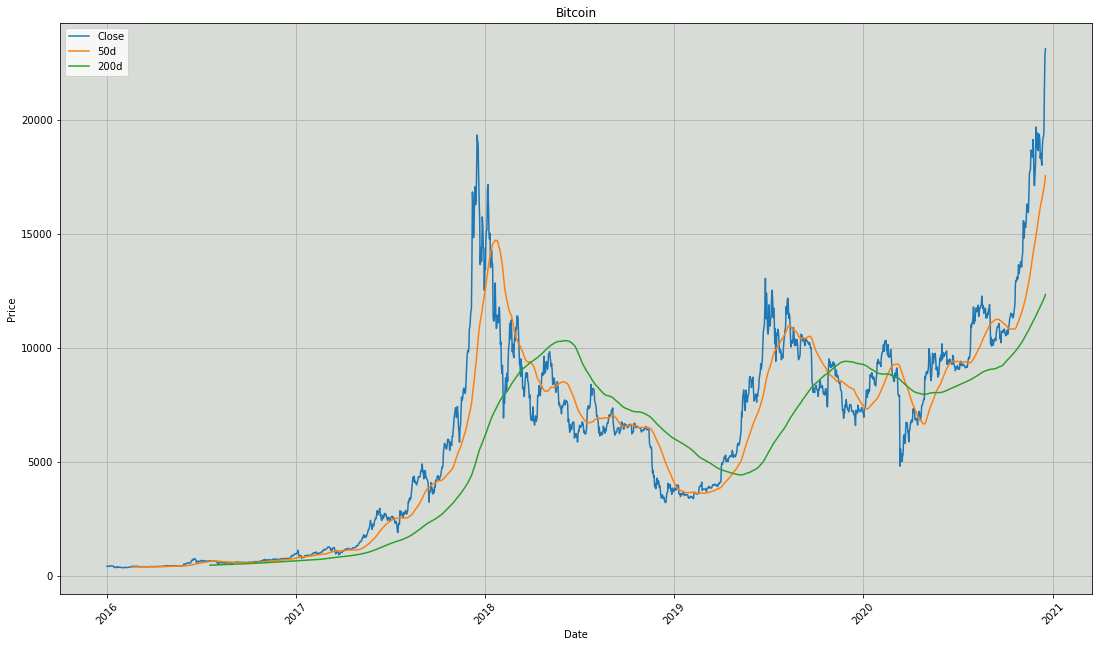

In [105]:
fig, ax = plt.subplots()
ax.plot(btc['Date'], btc[['Close', '50d', '200d']])
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.set_title('Bitcoin')
plt.xticks(rotation=45)
# plt.text(x=1970, y=400, s=r'Stock Price at this interval')
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend(['Close', '50d', '200d'], loc='upper left')
ax.set_facecolor('xkcd:light grey')
# graphPath = 'data/stocks'
# graphName = input('Save graph as: ') + '.png'
# graphFileName = os.path.join(graphPath, graphName)
# plt.savefig(graphFileName)